In [1]:
import pandas as pd
import numpy as np

In [30]:
predictions_df = pd.read_csv('../predictions.csv')

In [44]:
h10_h35_df = pd.DataFrame(columns=['h10_h35'])
h10_h35_df['h10_h35'] = predictions_df['h35'] + predictions_df['h10']
h10_h35_df.head()

,h10_h35
0,TTGACATATAAT
1,TTGACATATAAT
2,TTGACATATAAT
3,TTGACATATAAT
4,TTGACATATAAT


In [49]:
def one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1]}
    return np.concatenate([mapping[base] for base in sequence])

# Apply the function to each sequence
df_encoded = h10_h35_df['h10_h35'].apply(one_hot_encode)
df_encoded.head()


0    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, ...
1    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, ...
2    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, ...
3    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, ...
4    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, ...
Name: h10_h35, dtype: object

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded.tolist())

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)


In [63]:
df_pca = pd.DataFrame(X_pca, columns=['PC' + str(i) for i in range(1, 5)])

PC1


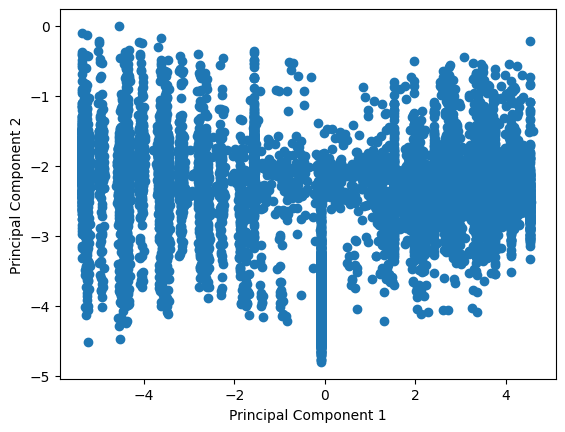

PC2


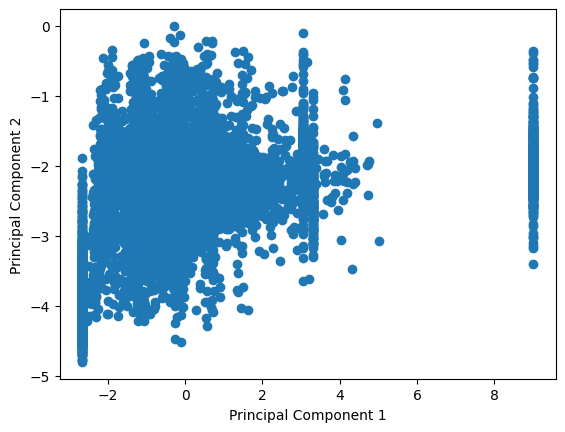

PC3


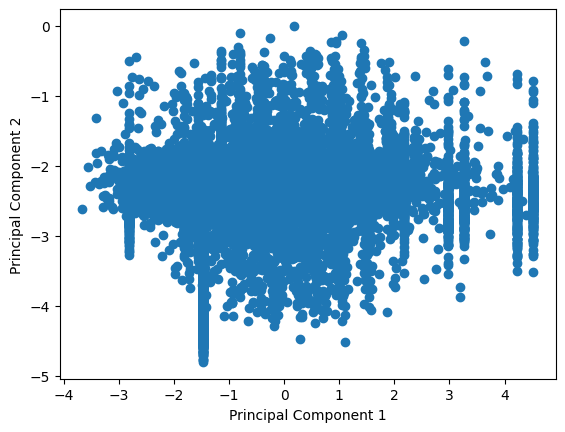

PC4


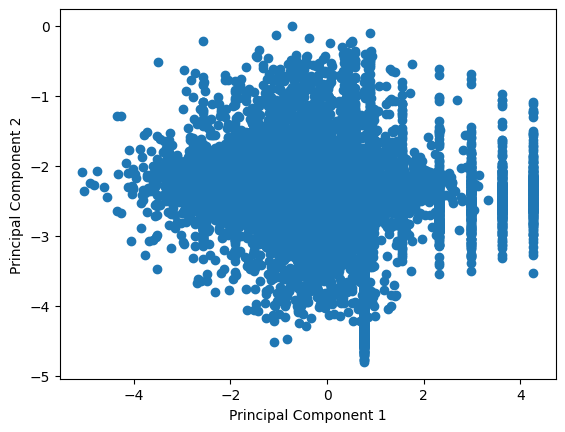

Observed log(TX/Txref)


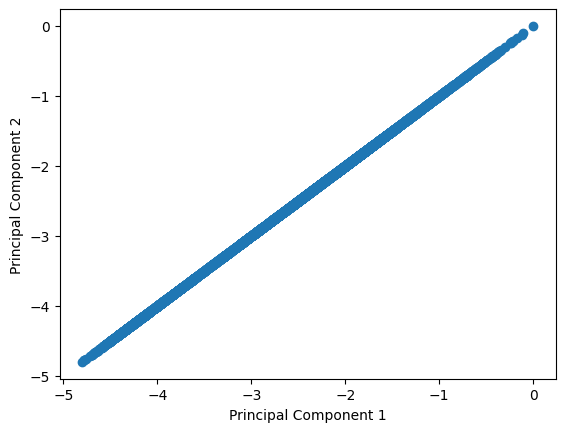

In [67]:
from matplotlib import pyplot as plt

df_pca['Observed log(TX/Txref)'] = predictions_df['Observed log(TX/Txref)']

for pc in df_pca:
    print(pc)
    plt.scatter(df_pca[pc], df_pca['Observed log(TX/Txref)'])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
